Download glove from [here](http://nlp.stanford.edu/data/glove.6B.zip)

In [2]:
my_text = 'the king and queen both had ham and loved it'

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

In [4]:
matrix = CountVectorizer()

In [5]:
X = matrix.fit_transform(my_text.split(' ')).toarray()

In [6]:
X

array([[0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

There is a relationship between words. Which this doesn't understand

In [7]:
glove = {}
with open('glove.6B.50d.txt', 'rb') as f:
    my_val = next(f)

In [8]:
my_val

b'the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581\n'

In [9]:
my_val.split()[0]

b'the'

In [10]:
type(my_val.split()[0])

bytes

In [11]:
type(my_val.split()[0].decode('utf-8'))

str

In [12]:
my_val.split()[1]

b'0.418'

In [13]:
glove = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in my_text.split(' '):
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [14]:
glove1 = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in my_text.split(' '):
            vector = np.array(parts[1:], dtype = np.float32)
            glove1[word] = vector

In [15]:
import gensim.models 

In [16]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [17]:
glove2word2vec(glove_input_file="glove.6B.50d.txt", word2vec_output_file="gensim_glove_vectors.txt")

(400000, 50)

In [18]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

In [19]:
glove_model['king']

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

In [20]:
glove_model.most_similar(positive = 'king')

[('prince', 0.8236179351806641),
 ('queen', 0.7839043140411377),
 ('ii', 0.7746230363845825),
 ('emperor', 0.7736247181892395),
 ('son', 0.7667193412780762),
 ('uncle', 0.7627150416374207),
 ('kingdom', 0.7542160749435425),
 ('throne', 0.7539913654327393),
 ('brother', 0.7492411136627197),
 ('ruler', 0.7434253096580505)]

In [21]:
glove_model.most_similar(negative = 'king')

[('visting', 0.7508502006530762),
 ('valenica', 0.7314242720603943),
 ('visted', 0.7047982215881348),
 ('falconí', 0.6931325793266296),
 ('guayasamin', 0.6898730993270874),
 ('1.2696', 0.6873390078544617),
 ('kd95', 0.6871767640113831),
 ('1.3673', 0.6807134747505188),
 ('1.2805', 0.6797599792480469),
 ('1.2644', 0.6791524291038513)]

In [22]:
# king + woman - man
glove_model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.8523603677749634),
 ('throne', 0.7664334177970886),
 ('prince', 0.759214460849762),
 ('daughter', 0.7473883032798767),
 ('elizabeth', 0.74602210521698),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184862494468689),
 ('widow', 0.7099430561065674)]

In [23]:
glove_model.doesnt_match(['king', 'queen', 'prince', 'basketball'])

'basketball'

In [24]:
X =glove_model['king'], glove_model['queen'], glove_model['man'], glove_model['woman']

In [25]:
from sklearn.manifold import TSNE



tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [26]:
X_tsne

array([[ 163.5299  ,  -48.247482],
       [-219.07742 ,   41.810978],
       [-309.14218 , -340.79486 ],
       [  73.465096, -430.8533  ]], dtype=float32)

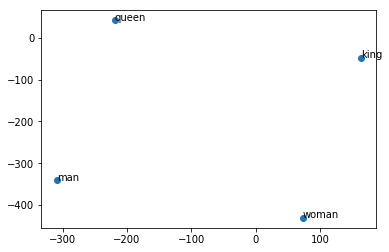

In [27]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
my_words = ['king', 'queen', 'man', 'woman']
for x, w in zip(X_tsne, my_words):
    plt.text(x[0], x[1], w)
plt.show()

In [28]:
X =glove_model['green'], glove_model['blue'], glove_model['yellow'], glove_model['alfredo'], glove_model['spaghetti'], \
     glove_model['pasta']

In [29]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

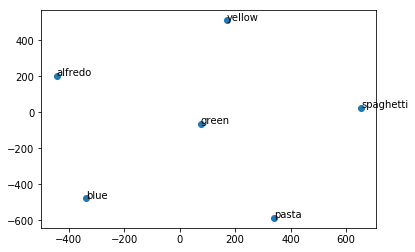

In [30]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
my_words = ['green', 'blue', 'yellow', 'alfredo', 'spaghetti', 'pasta']
for x, w in zip(X_tsne, my_words):
    plt.text(x[0], x[1], w)
plt.show()

In [31]:
X =glove_model['shower'], glove_model['toilet'], glove_model['sink'], glove_model['refrigerator'], \
     glove_model['microwave'], glove_model['stove'], glove_model['oven']

In [32]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

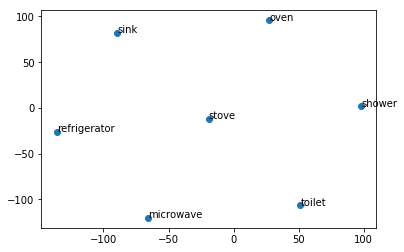

In [33]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
my_words = ['shower', 'toilet', 'sink', 'refrigerator', 'microwave', 'stove', 'oven']
for x, w in zip(X_tsne, my_words):
    plt.text(x[0], x[1], w)
plt.show()

In [34]:
X =glove_model['dog'], glove_model['cat'], glove_model['wolf'], glove_model['tiger']

In [35]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

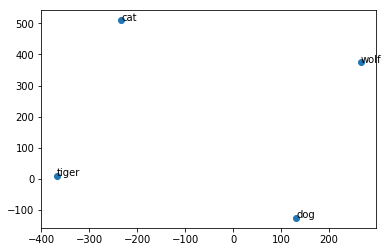

In [36]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
my_words = ['dog', 'cat', 'wolf', 'tiger']
for x, w in zip(X_tsne, my_words):
    plt.text(x[0], x[1], w)
plt.show()

https://nlp.stanford.edu/pubs/glove.pdf

In [37]:
import pandas as pd

In [38]:
df = pd.read_json('News_Category_Dataset_v2.json', lines=True)

In [39]:
df.shape

(200853, 6)

In [40]:
df = df.sample(frac=0.1)

In [41]:
df.shape

(20085, 6)

In [42]:
df.head()

,authors,category,date,headline,link,short_description
127173,"Dark Rye, Contributor\nAn online magazine from...",FOOD & DRINK,2014-03-25,"Reduce, Reuse, Revive! How This Kombucha Compa...",https://www.huffingtonpost.com/entry/reduce-re...,No one can deny that it's supremely healthy. A...
186245,,WEDDINGS,2012-07-03,UFO Day: Alien-Themed Weddings And Out-Of-This...,https://www.huffingtonpost.com/entry/ufo-day_u...,Would you want aliens to touch down on your we...
184173,"Mark Steinberg, Contributor\nSatirist and aspi...",TRAVEL,2012-07-25,American Airlines To Frequent Fliers: 'Go To H...,https://www.huffingtonpost.com/entry/america-a...,On a recent Monday morning I walked into the O...
187500,Dana Oliver,STYLE & BEAUTY,2012-06-20,"Beverly Johnson's Makeup Routine: Fish Oil, Fa...",https://www.huffingtonpost.com/entry/beverly-j...,Models are used to sitting for hours backstage...
190110,"Rebecca Dolan, Contributor\nAssociate Editor, ...",TRAVEL,2012-05-23,Abandoned Bermuda: Exploring An Old NASA Outpo...,https://www.huffingtonpost.com/entry/abandoned...,The road is no longer lined with quaint houses...


In [43]:
df['category'].nunique()

41

In [44]:
df['category'].value_counts()

POLITICS          3237
WELLNESS          1824
ENTERTAINMENT     1683
TRAVEL             975
STYLE & BEAUTY     924
PARENTING          871
QUEER VOICES       649
HEALTHY LIVING     636
FOOD & DRINK       612
BUSINESS           575
COMEDY             544
SPORTS             484
BLACK VOICES       452
HOME & LIVING      423
PARENTS            385
THE WORLDPOST      381
WEDDINGS           368
WOMEN              352
IMPACT             346
CRIME              345
DIVORCE            315
RELIGION           277
MEDIA              276
WEIRD NEWS         265
GREEN              258
STYLE              258
WORLDPOST          231
SCIENCE            229
WORLD NEWS         207
TASTE              195
MONEY              180
TECH               180
ARTS               166
GOOD NEWS          152
ENVIRONMENT        150
FIFTY              144
ARTS & CULTURE     122
LATINO VOICES      109
EDUCATION          104
COLLEGE            102
CULTURE & ARTS      99
Name: category, dtype: int64

In [45]:
df.head()

,authors,category,date,headline,link,short_description
127173,"Dark Rye, Contributor\nAn online magazine from...",FOOD & DRINK,2014-03-25,"Reduce, Reuse, Revive! How This Kombucha Compa...",https://www.huffingtonpost.com/entry/reduce-re...,No one can deny that it's supremely healthy. A...
186245,,WEDDINGS,2012-07-03,UFO Day: Alien-Themed Weddings And Out-Of-This...,https://www.huffingtonpost.com/entry/ufo-day_u...,Would you want aliens to touch down on your we...
184173,"Mark Steinberg, Contributor\nSatirist and aspi...",TRAVEL,2012-07-25,American Airlines To Frequent Fliers: 'Go To H...,https://www.huffingtonpost.com/entry/america-a...,On a recent Monday morning I walked into the O...
187500,Dana Oliver,STYLE & BEAUTY,2012-06-20,"Beverly Johnson's Makeup Routine: Fish Oil, Fa...",https://www.huffingtonpost.com/entry/beverly-j...,Models are used to sitting for hours backstage...
190110,"Rebecca Dolan, Contributor\nAssociate Editor, ...",TRAVEL,2012-05-23,Abandoned Bermuda: Exploring An Old NASA Outpo...,https://www.huffingtonpost.com/entry/abandoned...,The road is no longer lined with quaint houses...


In [46]:
X = matrix.fit_transform(df['headline']).toarray()
X.shape

(20085, 20803)

In [47]:
df.shape

(20085, 6)

In [48]:
y = df['category']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
%%time
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 50.9 s, sys: 2.1 s, total: 53 s
Wall time: 53.9 s


In [53]:
clf.score(X_test, y_test)

0.3576708402473978

In [54]:
clf.score(X_train, y_train)

0.9913049940546967

In [55]:
%%time
clf = RandomForestClassifier(max_depth = 10)
clf.fit(X_train, y_train)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 4.03 s, sys: 476 ms, total: 4.51 s
Wall time: 4.52 s


In [56]:
clf.score(X_test, y_test)

0.1767989138633278

In [57]:
clf.score(X_train, y_train)

0.19991082045184305

## Word Embeddings 

In [58]:
df.head()

,authors,category,date,headline,link,short_description
127173,"Dark Rye, Contributor\nAn online magazine from...",FOOD & DRINK,2014-03-25,"Reduce, Reuse, Revive! How This Kombucha Compa...",https://www.huffingtonpost.com/entry/reduce-re...,No one can deny that it's supremely healthy. A...
186245,,WEDDINGS,2012-07-03,UFO Day: Alien-Themed Weddings And Out-Of-This...,https://www.huffingtonpost.com/entry/ufo-day_u...,Would you want aliens to touch down on your we...
184173,"Mark Steinberg, Contributor\nSatirist and aspi...",TRAVEL,2012-07-25,American Airlines To Frequent Fliers: 'Go To H...,https://www.huffingtonpost.com/entry/america-a...,On a recent Monday morning I walked into the O...
187500,Dana Oliver,STYLE & BEAUTY,2012-06-20,"Beverly Johnson's Makeup Routine: Fish Oil, Fa...",https://www.huffingtonpost.com/entry/beverly-j...,Models are used to sitting for hours backstage...
190110,"Rebecca Dolan, Contributor\nAssociate Editor, ...",TRAVEL,2012-05-23,Abandoned Bermuda: Exploring An Old NASA Outpo...,https://www.huffingtonpost.com/entry/abandoned...,The road is no longer lined with quaint houses...


In [59]:
glove_model['what']

array([ 0.45323 ,  0.059811, -0.10577 , -0.333   ,  0.72359 , -0.08717 ,
       -0.61053 , -0.037695, -0.30945 ,  0.21805 , -0.43605 ,  0.47318 ,
       -0.76866 , -0.2713  ,  1.1042  ,  0.59141 ,  0.56962 , -0.18678 ,
        0.14867 , -0.67292 , -0.34672 ,  0.52284 ,  0.22959 , -0.072014,
        0.93967 , -2.3985  , -1.3238  ,  0.28698 ,  0.75509 , -0.76522 ,
        3.3425  ,  0.17233 , -0.51803 , -0.8297  , -0.29333 , -0.50076 ,
       -0.15228 ,  0.098973,  0.18146 , -0.1742  , -0.40666 ,  0.20348 ,
       -0.011788,  0.48252 ,  0.024598,  0.34064 , -0.084724,  0.5324  ,
       -0.25103 ,  0.62546 ], dtype=float32)

In [60]:
df['headline'] = df['headline'].str.lower()

In [61]:
df.head()

,authors,category,date,headline,link,short_description
127173,"Dark Rye, Contributor\nAn online magazine from...",FOOD & DRINK,2014-03-25,"reduce, reuse, revive! how this kombucha compa...",https://www.huffingtonpost.com/entry/reduce-re...,No one can deny that it's supremely healthy. A...
186245,,WEDDINGS,2012-07-03,ufo day: alien-themed weddings and out-of-this...,https://www.huffingtonpost.com/entry/ufo-day_u...,Would you want aliens to touch down on your we...
184173,"Mark Steinberg, Contributor\nSatirist and aspi...",TRAVEL,2012-07-25,american airlines to frequent fliers: 'go to h...,https://www.huffingtonpost.com/entry/america-a...,On a recent Monday morning I walked into the O...
187500,Dana Oliver,STYLE & BEAUTY,2012-06-20,"beverly johnson's makeup routine: fish oil, fa...",https://www.huffingtonpost.com/entry/beverly-j...,Models are used to sitting for hours backstage...
190110,"Rebecca Dolan, Contributor\nAssociate Editor, ...",TRAVEL,2012-05-23,abandoned bermuda: exploring an old nasa outpo...,https://www.huffingtonpost.com/entry/abandoned...,The road is no longer lined with quaint houses...


In [63]:
len(df.loc[127173, 'headline'].split())

12

In [64]:
word_list = []
for word in df.loc[127173, 'headline'].split():
    word_list.append(glove_model[word])

KeyError: "word 'reduce,' not in vocabulary"

In [65]:
word_list = []
for word in df.loc[127173, 'headline'].split():
    try:
        word_list.append(glove_model[word])
    except KeyError:
        continue

In [66]:
len(word_list)

9

In [67]:
df.head()

,authors,category,date,headline,link,short_description
127173,"Dark Rye, Contributor\nAn online magazine from...",FOOD & DRINK,2014-03-25,"reduce, reuse, revive! how this kombucha compa...",https://www.huffingtonpost.com/entry/reduce-re...,No one can deny that it's supremely healthy. A...
186245,,WEDDINGS,2012-07-03,ufo day: alien-themed weddings and out-of-this...,https://www.huffingtonpost.com/entry/ufo-day_u...,Would you want aliens to touch down on your we...
184173,"Mark Steinberg, Contributor\nSatirist and aspi...",TRAVEL,2012-07-25,american airlines to frequent fliers: 'go to h...,https://www.huffingtonpost.com/entry/america-a...,On a recent Monday morning I walked into the O...
187500,Dana Oliver,STYLE & BEAUTY,2012-06-20,"beverly johnson's makeup routine: fish oil, fa...",https://www.huffingtonpost.com/entry/beverly-j...,Models are used to sitting for hours backstage...
190110,"Rebecca Dolan, Contributor\nAssociate Editor, ...",TRAVEL,2012-05-23,abandoned bermuda: exploring an old nasa outpo...,https://www.huffingtonpost.com/entry/abandoned...,The road is no longer lined with quaint houses...


In [68]:
# take the mean of the vector 
np.mean(word_list, axis = 0)

array([ 0.28944778, -0.16171445, -0.29242414,  0.38536665,  0.17708741,
        0.07212285, -0.5343861 , -0.4812778 ,  0.24074888,  0.19939889,
        0.23706225,  0.25039142, -0.21456334, -0.09984334,  0.28472474,
        0.31232622,  0.01681512,  0.47199312, -0.02169111, -0.58509445,
        0.41479033, -0.17769665, -0.01951301,  0.02672233,  0.08377   ,
       -1.2109534 , -0.5880589 ,  0.13394973,  0.30296102,  0.06186944,
        2.780061  , -0.11739322, -0.15902954, -0.1690909 , -0.13629977,
       -0.28639978, -0.4152778 ,  0.3214111 ,  0.14552122, -0.05159488,
       -0.15011366, -0.21099477, -0.11124221,  0.22515029,  0.01952623,
        0.26032054, -0.22541091,  0.14589034,  0.01207   ,  0.167433  ],
      dtype=float32)

In [69]:
np.mean(word_list, axis = 0).shape

(50,)

In [70]:
my_mean_embeddings = []
for title in df['headline']:
    mean_embedding = []
    for word in title:
        try:
            mean_embedding.append(glove_model[word])
        except KeyError:
            continue
    my_mean_embeddings.append(np.mean(mean_embedding, axis = 0))

In [71]:
len(my_mean_embeddings)

20085

In [72]:
my_mean_embeddings[0].shape

(50,)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(my_mean_embeddings, y, test_size=0.33, random_state=42)

In [74]:
%%time
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1.51 s, sys: 26.7 ms, total: 1.54 s
Wall time: 1.54 s


In [75]:
clf.score(X_train, y_train)

0.9936087990487514

In [76]:
clf.score(X_test, y_test)

0.13697390254940414

In [77]:
%%time
clf = RandomForestClassifier(max_depth = 10)
clf.fit(X_train, y_train)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 908 ms, sys: 13.9 ms, total: 922 ms
Wall time: 919 ms


In [78]:
clf.score(X_train, y_train)

0.37841854934601665

In [79]:
clf.score(X_test, y_test)

0.18238044953990043

In [83]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [84]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['headline'])
sequences = tokenizer.texts_to_sequences(df['headline'])
data = pad_sequences(sequences, maxlen=25)

In [85]:
df['headline'].head()

127173    reduce, reuse, revive! how this kombucha compa...
186245    ufo day: alien-themed weddings and out-of-this...
184173    american airlines to frequent fliers: 'go to h...
187500    beverly johnson's makeup routine: fish oil, fa...
190110    abandoned bermuda: exploring an old nasa outpo...
Name: headline, dtype: object

In [86]:
sequences

[[1358, 6355, 15, 19, 8143, 896, 8, 798, 1, 771],
 [5209, 29, 2885, 2263, 1017, 7, 44, 4, 19, 72, 5210, 24],
 [161,
  1657,
  2,
  8144,
  8145,
  3514,
  2,
  1415,
  7,
  108,
  1658,
  2,
  253,
  11,
  1961,
  2,
  64],
 [4456, 8146, 772, 2264, 2442, 773, 2443, 31, 24],
 [2113, 3174, 39, 119, 1835, 8147, 9, 5211, 1018],
 [1, 711, 470, 208, 1285, 60, 84],
 [1659, 33, 168, 31, 1098, 190, 1962, 449, 897],
 [103, 5212, 6356, 33, 632, 12, 8148],
 [39, 1168, 277, 25, 80, 336, 11, 2444, 53],
 [1836, 8149, 3948, 2114],
 [3515, 2265, 2, 5213, 21, 1566, 898, 1359, 1963],
 [1837, 2886, 1741, 873, 10, 5214, 531, 799],
 [14, 2445, 16, 449, 389, 28, 194, 333, 172, 8150],
 [1019, 3, 9, 738, 29, 6, 151, 2446, 115],
 [1, 188, 38, 5, 1, 58, 57, 13],
 [1660, 2266, 2267, 8, 95, 460, 899, 87, 1, 175, 51, 41, 1838, 61, 78, 8151],
 [2115, 141, 2, 1169, 900, 4, 3949, 226, 4, 81, 88],
 [2116, 1170, 4457, 5215, 6357, 8152, 219, 17, 3516],
 [1964, 35, 1416, 471, 8, 325, 2447],
 [2887, 161, 1742, 157, 1060, 3

In [87]:
data

array([[   0,    0,    0, ...,  798,    1,  771],
       [   0,    0,    0, ...,   72, 5210,   24],
       [   0,    0,    0, ..., 1961,    2,   64],
       ...,
       [   0,    0,    0, ...,  324, 5119,    5],
       [   0,    0,    0, ...,   28, 4226,  399],
       [   0,    0,    0, ...,  443,    2, 5234]], dtype=int32)

In [88]:
for word, index in tokenizer.word_index.items():
    print(word, index)

the 1
to 2
a 3
of 4
in 5
for 6
and 7
is 8
on 9
with 10
your 11
you 12
photos 13
trump 14
how 15
new 16
at 17
from 18
this 19
are 20
about 21
what 22
be 23
video 24
that 25
why 26
it 27
after 28
day 29
as 30
more 31
donald 32
will 33
not 34
my 35
by 36
i 37
best 38
an 39
up 40
her 41
5 42
his 43
out 44
says 45
we 46
can 47
have 48
10 49
do 50
over 51
who 52
life 53
one 54
first 55
make 56
s 57
u 58
when 59
should 60
has 61
year 62
all 63
get 64
time 65
people 66
like 67
trump's 68
our 69
ways 70
was 71
world 72
could 73
their 74
women 75
most 76
things 77
just 78
health 79
may 80
black 81
no 82
kids 83
know 84
week 85
love 86
but 87
man 88
watch 89
photo 90
home 91
7 92
than 93
if 94
now 95
he 96
wedding 97
gop 98
3 99
obama 100
back 101
it's 102
these 103
off 104
white 105
into 106
or 107
don't 108
need 109
clinton 110
us 111
bill 112
so 113
6 114
food 115
gay 116
top 117
house 118
old 119
want 120
way 121
here's 122
years 123
good 124
study 125
'the 126
help 127
' 128
look 129
school 

lady 999
youtube 1000
growing 1001
uses 1002
chocolate 1003
voter 1004
designer 1005
across 1006
fix 1007
rich 1008
prevent 1009
happen 1010
revealed 1011
creating 1012
boost 1013
names 1014
half 1015
choice 1016
weddings 1017
island 1018
join 1019
sales 1020
met 1021
send 1022
children's 1023
bush 1024
executive 1025
sure 1026
incredible 1027
al 1028
offers 1029
famous 1030
proves 1031
soul 1032
cast 1033
then 1034
church 1035
calling 1036
hill 1037
victims 1038
charges 1039
proof 1040
dangerous 1041
moore 1042
dark 1043
nothing 1044
smith 1045
later 1046
homes 1047
movies 1048
note 1049
helping 1050
well 1051
brings 1052
hard 1053
design 1054
virginia 1055
light 1056
suspect 1057
sports 1058
actress 1059
historic 1060
silence 1061
massive 1062
diet 1063
primary 1064
autism 1065
culture 1066
university 1067
non 1068
longer 1069
jail 1070
small 1071
teens 1072
beer 1073
wish 1074
illness 1075
those 1076
press 1077
defense 1078
drugs 1079
store 1080
dreams 1081
seth 1082
francis 1083
cl

quick 1749
sell 1750
jeff 1751
angry 1752
confederate 1753
rose 1754
theater 1755
angelina 1756
driving 1757
ties 1758
oliver 1759
smart 1760
nature 1761
syrian 1762
staff 1763
m 1764
keeping 1765
dirty 1766
progressive 1767
india 1768
bee 1769
alaska 1770
jason 1771
cheating 1772
vogue 1773
telling 1774
ship 1775
paying 1776
hall 1777
users 1778
taxes 1779
presidency 1780
vice 1781
lies 1782
kevin 1783
politicians 1784
focus 1785
q 1786
homemade 1787
outfit 1788
keeps 1789
honest 1790
magic 1791
hero 1792
bizarre 1793
tree 1794
caught 1795
picks 1796
anyway 1797
controversy 1798
arrest 1799
keys 1800
website 1801
updated 1802
fast 1803
vows 1804
h 1805
it’s 1806
michigan 1807
trial 1808
'i'm 1809
wage 1810
60 1811
fired 1812
deep 1813
cards 1814
wake 1815
cash 1816
knew 1817
add 1818
german 1819
23 1820
forever 1821
teigen 1822
hawaii 1823
japan 1824
millennials 1825
feet 1826
pet 1827
podcast 1828
chuck 1829
carson 1830
alzheimer's 1831
expensive 1832
35 1833
quotes 1834
nasa 1835
an

28 2495
melania 2496
motherhood 2497
gap 2498
council 2499
meaning 2500
communities 2501
alex 2502
dry 2503
income 2504
time' 2505
celebration 2506
respond 2507
lets 2508
wisdom 2509
affordable 2510
toll 2511
graduation 2512
steal 2513
poem 2514
looked 2515
punk 2516
shoots 2517
member 2518
me' 2519
foundation 2520
globe 2521
jack 2522
kansas 2523
draws 2524
seeing 2525
damon 2526
majority 2527
succeed 2528
projects 2529
resign 2530
philippine 2531
mortgage 2532
superhero 2533
flood 2534
empire 2535
keith 2536
peanut 2537
professional 2538
wasn't 2539
curry 2540
billionaire 2541
300 2542
elephant 2543
spotlight 2544
gain 2545
charleston 2546
edition 2547
nurse 2548
apnea 2549
carly 2550
monster 2551
killer 2552
athlete 2553
magical 2554
charlie 2555
flip 2556
hints 2557
stupid 2558
lincoln 2559
importance 2560
cultural 2561
sells 2562
detroit 2563
hip 2564
bucket 2565
starbucks 2566
burns 2567
degeneres 2568
listening 2569
mitt 2570
paltrow 2571
discusses 2572
vp 2573
cutest 2574
stole

designed 3235
terrorist 3236
stick 3237
glamour 3238
broke 3239
websites 3240
difficult 3241
jeans 3242
glasses 3243
hungry 3244
miller 3245
spotted 3246
estate 3247
affected 3248
grounds 3249
parker 3250
golf 3251
dramatic 3252
magazine's 3253
ramadan 3254
beard 3255
finish 3256
hiding 3257
nick 3258
production 3259
initiative 3260
regular 3261
channel 3262
hopes 3263
northern 3264
solving 3265
confirmed 3266
stuns 3267
authentic 3268
include 3269
witness 3270
article 3271
preschool 3272
treated 3273
talent 3274
collins 3275
heels 3276
hometown 3277
housing 3278
exhibit 3279
tired 3280
'it's 3281
blaming 3282
approves 3283
denim 3284
sanctions 3285
august 3286
stops 3287
'saturday 3288
japanese 3289
finance 3290
street' 3291
mid 3292
richards 3293
potter' 3294
scout 3295
marry 3296
urban 3297
drought 3298
floor 3299
firm 3300
millennial 3301
priest 3302
damn 3303
danger 3304
merkel 3305
denial 3306
undocumented 3307
deportation 3308
tie 3309
grown 3310
basketball 3311
catches 3312
cre

swimming 3997
hockey 3998
devastating 3999
proposes 4000
seinfeld 4001
fashioned 4002
decade 4003
reunite 4004
minaj 4005
bloggers 4006
finger 4007
'it' 4008
dadmissions 4009
highlight 4010
grey' 4011
sally 4012
quietly 4013
41 4014
kenya 4015
prom 4016
inclusive 4017
rex 4018
tillerson 4019
commit 4020
peyton 4021
armed 4022
elf 4023
shelf 4024
reporters 4025
boko 4026
haram 4027
contestant 4028
spectacular 4029
settlements 4030
parliament 4031
impossible 4032
die' 4033
fest 4034
annual 4035
friendship 4036
approved 4037
retro 4038
allows 4039
thursday's 4040
81 4041
sitcom 4042
islam 4043
3d 4044
printed 4045
coral 4046
crossfit 4047
lingerie 4048
opinion 4049
post's 4050
ashamed 4051
airstrikes 4052
roses 4053
lobby 4054
advances 4055
sustainable 4056
multi 4057
spy 4058
origin 4059
masters 4060
accessories 4061
allen 4062
thompson 4063
guarantee 4064
nod 4065
yours 4066
dirt 4067
terrorists 4068
g 4069
startup 4070
jazz 4071
haters 4072
meant 4073
dc 4074
girlfriends 4075
tales 407

cultivate 4756
doc 4757
strengthen 4758
qualified 4759
illegally 4760
robinson 4761
extraordinary 4762
nationwide 4763
spa 4764
berkeley 4765
nay 4766
wages 4767
activities 4768
landlord 4769
turner 4770
harper's 4771
bazaar 4772
pile 4773
information 4774
product 4775
accepts 4776
blessing 4777
fees 4778
supposed 4779
singing 4780
passion 4781
vine 4782
fought 4783
weapon 4784
taxi 4785
ratings 4786
bullied 4787
cyber 4788
stabbed 4789
machines 4790
cox 4791
reince 4792
priebus 4793
rogue 4794
destroy 4795
beaten 4796
dementia 4797
reconsider 4798
traditions 4799
lucky 4800
organizing 4801
hanukkah 4802
'x 4803
shadows 4804
portland 4805
lone 4806
hint 4807
captain 4808
sofia 4809
dennis 4810
discipline 4811
strategic 4812
drinks 4813
substance 4814
asylum 4815
'could 4816
harvey's 4817
cher 4818
northeast 4819
steves' 4820
bath 4821
sexting 4822
'la 4823
derails 4824
contact 4825
dump 4826
shampoo 4827
contain 4828
kisses 4829
sync 4830
bishop 4831
39 4832
devices 4833
batman 4834
un

gems 5497
noise 5498
potty 5499
semitism 5500
ruined 5501
brutal 5502
'bachelor' 5503
contestants 5504
blows 5505
menendez 5506
bribery 5507
endless 5508
triumph 5509
braxton 5510
fundraiser 5511
cooling 5512
painted 5513
yellow 5514
manhattan 5515
mila 5516
kunis 5517
pearls 5518
opposes 5519
tougher 5520
nap 5521
sophia 5522
lewandowski 5523
reed 5524
44 5525
bracket 5526
lawmaker's 5527
dodge 5528
counsel 5529
poised 5530
kaley 5531
bow 5532
barred 5533
psychological 5534
follows 5535
loans 5536
wounds 5537
cheats 5538
grammar 5539
tribeca 5540
flips 5541
winslet 5542
barrymore 5543
undermine 5544
thing' 5545
furious' 5546
dicaprio 5547
pac 5548
'life 5549
cory 5550
passover 5551
coconut 5552
populist 5553
tacos 5554
bell's 5555
'late 5556
promo 5557
baking 5558
beatles 5559
separation 5560
springsteen 5561
kinda 5562
planet's 5563
fedex 5564
packages 5565
cloud 5566
busted 5567
unfair 5568
steel 5569
ashton 5570
ditch 5571
punched 5572
sneaky 5573
clergy 5574
marlon 5575
abusive 55

denounce 6244
harlem 6245
lang 6246
threatened 6247
widespread 6248
gucci 6249
prepared 6250
macfarlane 6251
permission 6252
added 6253
dance' 6254
'n 6255
morris 6256
friends' 6257
transformative 6258
advisory 6259
line' 6260
felony 6261
formal 6262
rica 6263
nonpartisan 6264
74 6265
euro 6266
sacrifice 6267
chattman 6268
strangest 6269
petite 6270
balloon 6271
kickstarter 6272
ultra 6273
shepard 6274
panda 6275
neighbor 6276
'high 6277
requests 6278
bergdahl 6279
hatred 6280
rivers 6281
unknown 6282
pissed 6283
divisions 6284
shootout 6285
dumbest 6286
78 6287
prejudice 6288
mlb 6289
glow 6290
dodgers 6291
laden 6292
daddy 6293
portman 6294
larger 6295
ann 6296
chains 6297
'thank 6298
posting 6299
eva 6300
protein 6301
latinas 6302
nest 6303
all' 6304
tutorial 6305
info 6306
dave 6307
obstacles 6308
waterfalls 6309
rallies 6310
aged 6311
sweets 6312
destroys 6313
trophy 6314
'fox 6315
disappear 6316
towards 6317
vow 6318
recreating 6319
justification 6320
choked 6321
disturbing 6322


borrowers 6994
racially 6995
species 6996
predators 6997
hajj 6998
fear' 6999
oval 7000
comparing 7001
methane 7002
first' 7003
patterned 7004
wrestler 7005
eddie 7006
murphy 7007
traumatized 7008
anita 7009
belize 7010
columnist 7011
team's 7012
'doctor 7013
friendships 7014
shanghai 7015
rock' 7016
mushrooms 7017
nation' 7018
capitalism 7019
takeover 7020
chopping 7021
tai 7022
chi 7023
replaced 7024
registry 7025
candle 7026
presentation 7027
brendan 7028
lawn 7029
weren't 7030
throat 7031
coming' 7032
haunted 7033
tank 7034
retires 7035
sclerosis 7036
possession 7037
creation 7038
somerhalder 7039
statistic 7040
dazzling 7041
conquering 7042
turtles 7043
paws 7044
westbrook 7045
lazy 7046
networking 7047
deserved 7048
belong 7049
miserably 7050
lo 7051
four' 7052
trainer 7053
zip 7054
jab 7055
charm 7056
presence 7057
jacobs 7058
bra 7059
covered 7060
hoping 7061
manslaughter 7062
sheldon 7063
misleading 7064
unfortunate 7065
antibiotic 7066
discussing 7067
tackles 7068
classes 706

jane' 7745
partners 7746
cheers 7747
one's 7748
goods 7749
reconciliation 7750
neon 7751
pregnancies 7752
sickness 7753
translate 7754
ladies 7755
hopeful 7756
retreat 7757
spreading 7758
coat 7759
crawl 7760
empowerment 7761
cracks 7762
squad 7763
behaviors 7764
weinstein's 7765
strangers 7766
sugary 7767
nike 7768
impressed 7769
jackman 7770
stability 7771
we’ve 7772
azealia 7773
shakespeare 7774
reporting 7775
thrive 7776
lewd 7777
whom 7778
excellent 7779
avalanche 7780
besides 7781
tearing 7782
increasing 7783
wraps 7784
trusting 7785
floyd 7786
pacquiao 7787
skiing 7788
grieves 7789
kinds 7790
normalize 7791
onstage 7792
introduce 7793
'roseanne' 7794
homage 7795
celine 7796
dion 7797
'god 7798
'tone 7799
addicted 7800
enduring 7801
120 7802
fanatics 7803
reckoning 7804
hardy 7805
seeker 7806
carl 7807
taxpayers 7808
simmons 7809
mention 7810
stressful 7811
bounce 7812
redefine 7813
executed 7814
wimbledon 7815
snarky 7816
applauds 7817
conservatives' 7818
gaining 7819
roasted 78

womb 8499
1990s 8500
looting 8501
shortages 8502
matching 8503
pajamas 8504
punish 8505
carbs 8506
designing 8507
michel 8508
professors 8509
consent 8510
denounces 8511
murdered 8512
mri 8513
digits 8514
person' 8515
freshmen 8516
roots 8517
espionage 8518
accessing 8519
salted 8520
crème 8521
fraîche 8522
newsletter 8523
relatable 8524
man’s 8525
eligible 8526
limbaugh 8527
tate 8528
eyewear 8529
recycled 8530
dolphin 8531
mantra 8532
measures 8533
wreak 8534
havoc 8535
'honest 8536
cupid 8537
iceland 8538
ufos 8539
acquire 8540
jaden 8541
springs 8542
jbl 8543
minors 8544
element 8545
rages 8546
mercury 8547
uruguay 8548
legally 8549
regulate 8550
'billy 8551
lax 8552
mocked 8553
boys' 8554
milan 8555
sadness 8556
irony 8557
luck 8558
charms 8559
wayans 8560
punished 8561
toughest 8562
sleeps 8563
thirsty 8564
piscotty 8565
collision 8566
tidal 8567
aspartame 8568
khizr 8569
'against 8570
cranston 8571
lynn 8572
penelope 8573
mayo 8574
shrubs 8575
hulk 8576
postcards 8577
goldie 857

gettysburg 9241
agreed 9242
uae 9243
unsettling 9244
dam 9245
huh 9246
suspend 9247
actresses 9248
fiesta 9249
procrastination 9250
hailed 9251
fairy 9252
s'mores 9253
nhl 9254
dc's 9255
affleck 9256
vital 9257
location 9258
scorsese 9259
thicker 9260
unconstitutional 9261
bain 9262
headlines 9263
unsolicited 9264
prada 9265
dkny 9266
lemon 9267
roadside 9268
bench 9269
redemption' 9270
pakistan's 9271
appetite 9272
shouldn’t 9273
dysfunction 9274
drum 9275
priciest 9276
grandparenting 9277
unexplained 9278
relieving 9279
internationalization 9280
fonda 9281
delivering 9282
streaker 9283
yards 9284
'father 9285
operators 9286
drones 9287
underserved 9288
'nothing 9289
'there 9290
tumblr 9291
descend 9292
alberta 9293
peggy 9294
diary 9295
displaced 9296
reshaping 9297
fastball 9298
dane 9299
contradicts 9300
conduct 9301
welch 9302
waterproof 9303
handmaid's 9304
protestor 9305
walkable 9306
ludicrous 9307
arthur 9308
house’s 9309
'elle' 9310
harmony's 9311
accounting 9312
psychiatry 9

territory 9999
transistor 10000
newspaper's 10001
tucson 10002
marion 10003
cotillard 10004
infighting 10005
egypt's 10006
affection 10007
'aladdin' 10008
volunteerism 10009
baristas 10010
cheeseburger 10011
maxima's 10012
teresa 10013
tuscan 10014
doe 10015
shia 10016
cupcakes 10017
troye 10018
sivan 10019
nostalgic 10020
2009 10021
soaking 10022
bridesmaid 10023
face' 10024
replacements 10025
rated 10026
complicit 10027
matchup 10028
mis 10029
pastors 10030
enrollment 10031
bites 10032
earrings 10033
gout 10034
spoiled 10035
commute 10036
grimm 10037
milla 10038
jovovich 10039
backyard 10040
burst 10041
ghostly 10042
2004 10043
robe 10044
god' 10045
madea 10046
sluggish 10047
watchdog 10048
educators 10049
baskets 10050
peele 10051
lbd 10052
streams 10053
crowdsourced 10054
politics' 10055
beltway 10056
basel 10057
lionsgate 10058
dirtier 10059
peacefully 10060
viewers' 10061
plague 10062
warned 10063
sooner 10064
freud 10065
congressmen 10066
appreciating 10067
profiled 10068
shower

islamophobic 10745
2019 10746
incarceration 10747
frisk 10748
rescinds 10749
resignation 10750
issa 10751
tory 10752
revokes 10753
pancake 10754
teller 10755
stereotypical 10756
salesmanship 10757
fonts 10758
screensaver 10759
seniors 10760
gyllenhaal 10761
tupac 10762
'brexit' 10763
'guardians' 10764
puff 10765
laptop 10766
deportations 10767
diys 10768
demeaning 10769
beau 10770
mounting 10771
haitian 10772
goofy 10773
lovefest 10774
cuba's 10775
notice 10776
upper 10777
outsourcing 10778
finest 10779
unpopular 10780
dethrones 10781
mayim 10782
nighttime 10783
confess 10784
pairings 10785
tray 10786
congress’ 10787
mistook 10788
vodka 10789
100th 10790
nelson 10791
listing 10792
business' 10793
propaganda 10794
contempt 10795
'healthy' 10796
pickles 10797
'grease 10798
daphne 10799
initial 10800
bicycle 10801
'greatest 10802
motivate 10803
jasmine 10804
sew 10805
deepak 10806
armenian 10807
confession 10808
striking 10809
appetizers 10810
burundi 10811
louise 10812
'human 10813
extre

arming 11500
wield 11501
explosives 11502
trailblazing 11503
discoveries 11504
undoing 11505
escapee 11506
leader' 11507
stripes 11508
1984 11509
lifetime's 11510
jonbenet 11511
ramsey’s 11512
initiatives 11513
lyme 11514
spade 11515
pup 11516
wakes 11517
burka 11518
degrees 11519
tlc 11520
collaborate 11521
bulletproof 11522
executive's 11523
mustache 11524
wood's 11525
supportive 11526
atm 11527
dyes 11528
debbie 11529
reynolds' 11530
tanks 11531
laziest 11532
curly 11533
duchovny 11534
granted 11535
liner 11536
minogue's 11537
females 11538
braces 11539
ton 11540
patrol 11541
limerick 11542
bureau 11543
provided 11544
decoration 11545
polyamorous 11546
shakira 11547
criticized 11548
lifts 11549
overhaul 11550
gilbert 11551
bride's 11552
beak 11553
soil 11554
larsen 11555
torres 11556
budgets 11557
shapes 11558
waves 11559
feeds 11560
heartbeat 11561
klepper 11562
steer 11563
summer' 11564
starbucks' 11565
max' 11566
decreased 11567
subject 11568
nbcuniversal 11569
discriminate 11570

clashes 12248
usda's 12249
fodor's 12250
'corrosive 12251
stupidest 12252
autopsy 12253
carriers 12254
whcd 12255
chance' 12256
'genius' 12257
befuddled 12258
abrupt 12259
moonshot 12260
bottoms 12261
scavino 12262
anyone’s 12263
barclays 12264
'forever 12265
young' 12266
audra 12267
stx 12268
faves 12269
juliet 12270
1914 12271
gwist 12272
doomsaying 12273
peppermint 12274
'wedlease' 12275
queues 12276
shambolic 12277
bullfighter 12278
flacco 12279
allegory 12280
aggressively 12281
'gold 12282
rush' 12283
schnabel 12284
mckinley's 12285
denali 12286
vulgar 12287
darden 12288
outskirts 12289
paratrooper 12290
parachute 12291
yearley's 12292
unrepeatable 12293
enthralling 12294
fractals 12295
koreans 12296
unconcerned 12297
musk’s 12298
solarcity 12299
strip' 12300
symon's 12301
bernice 12302
ahmadiyya 12303
faiths 12304
stuffs 12305
hysterical 12306
remission 12307
pizzorno 12308
marissa 12309
stowe 12310
995 12311
'blood 12312
red' 12313
'bipartisan 12314
beer' 12315
busch’s 12316
soc

versa 13001
adolescence 13002
rookie 13003
morsi 13004
smashing 13005
ticketed 13006
toothaker 13007
'downward 13008
dog' 13009
douglas 13010
zeta 13011
juleps 13012
decoupage 13013
ivana 13014
herrera's 13015
designer's 13016
sophisticated 13017
'ho 13018
ho' 13019
baseline 13020
highlighting 13021
futility 13022
häagen 13023
dazs 13024
gelato 13025
unsatisfied 13026
lebanon’s 13027
enact 13028
placenta 13029
manmade 13030
earthquakes 13031
lovitz 13032
lowndes' 13033
'relationship' 13034
publicity 13035
frenchie 13036
maggots 13037
prevnar 13038
‘war 13039
coal’ 13040
'women 13041
fight' 13042
ticking 13043
'simply 13044
best' 13045
missoni 13046
lililite 13047
depressing 13048
reliable 13049
kim's 13050
chromosome 13051
faroe 13052
fermented 13053
grain 13054
balentine 13055
kukors 13056
lingo 13057
bauso 13058
loser 13059
trucks 13060
allman 13061
'electronics 13062
free' 13063
diagnoses 13064
gabourey 13065
sidibe 13066
'apathy 13067
option' 13068
upworthy 13069
fair' 13070
oselan

vague 13747
noms' 13748
'tragedy' 13749
waterfront 13750
elegance 13751
'exploding 13752
kittens' 13753
giddily 13754
sometime 13755
bodily 13756
nontraditional 13757
normal' 13758
microphones 13759
'fixer 13760
upper' 13761
popularized 13762
wallpaper 13763
imperative 13764
gourmetfest 13765
caviar 13766
carmel 13767
cd 13768
escape' 13769
monroe's 13770
hadn't 13771
serious' 13772
described 13773
politician' 13774
imbibe 13775
camps 13776
'sopranos' 13777
intersex 13778
individuals 13779
pomeranz's 13780
undemanding 13781
'cosmopolis' 13782
millos 13783
canucks 13784
feith 13785
garment 13786
goodell 13787
positive' 13788
lucci 13789
'teetering 13790
failure' 13791
width 13792
bomba 13793
estereo 13794
taillight 13795
microwave 13796
corrigan's 13797
nailing 13798
tailgating 13799
raving 13800
tater 13801
tots 13802
‘dribble’ 13803
'facebook' 13804
recommitting 13805
somethings 13806
bundle 13807
photographer's 13808
extols 13809
lepierre 13810
saul' 13811
variants 13812
wizards 1381

representative 14490
explicit 14491
theta 14492
sorority 14493
fannie 14494
sobering 14495
burrell 14496
vivid 14497
obamaandkids 14498
recruitment 14499
coop 14500
evocative 14501
ufuk 14502
bayraktar 14503
uggs 14504
guinness 14505
zukav 14506
biodegradable 14507
ronald 14508
schooler's 14509
'disaster 14510
request' 14511
digging 14512
citylove 14513
disenfranchise 14514
granola 14515
oats 14516
disinvests 14517
recanting 14518
oath 14519
adore 14520
hirono 14521
hayworth 14522
mayflower 14523
‘wine 14524
‘tequila 14525
inquire 14526
productively 14527
tierney 14528
oaks 14529
castile' 14530
'by 14531
dystopian 14532
ondria 14533
hardin 14534
chanel's 14535
hebrew 14536
malevolent 14537
rancic's 14538
doppelganger 14539
fda’s 14540
'sees' 14541
waistline 14542
finder 14543
behati 14544
prinsloo 14545
bruce's 14546
‘really 14547
level’ 14548
chipping 14549
toeing 14550
rev 14551
hardwick 14552
provincetown 14553
alexis 14554
leto 14555
bristowe 14556
xbox 14557
electronically 14558
p

'wild 15238
bridezillas 15239
mccullough 15240
wrongful 15241
1957 15242
innovating 15243
dumpster 15244
reminiscing 15245
sha 15246
newtons 15247
seatac's 15248
meteorite 15249
'fab' 15250
'brooklyn 15251
formal' 15252
haim 15253
mcshakeup 15254
angus 15255
remover 15256
acquitted 15257
pumice 15258
sparkle 15259
tonight's 15260
ef4 15261
unintended 15262
gifted 15263
youtube's 15264
recognizable 15265
museumgoer 15266
qnexa 15267
criticizes 15268
josefa 15269
berning 15270
bushwig 15271
paterson 15272
'bursting 15273
montalban 15274
detective 15275
testifying in 15276
bridgegate 15277
firefighters' 15278
cans 15279
doorbells 15280
punchline 15281
commence 15282
squee 15283
administrators 15284
smokescreen 15285
bhoumik 15286
pore 15287
springboard 15288
gabonese 15289
paulina 15290
porizkova 15291
ric 15292
ocasek 15293
'peacefully 15294
separated' 15295
murderer's' 15296
dassey 15297
nachos 15298
dannon 15299
carmine 15300
additive 15301
hasty 15302
freeing 15303
slaves 15304
tj 153

extremist 16003
kolcraft 16004
stroller 16005
amputations 16006
lacerations 16007
prompt 16008
airports' 16009
pelican 16010
skeletons 16011
coins 16012
pompeii 16013
excavation 16014
'impossible' 16015
chai 16016
saffron 16017
plum 16018
aloneness 16019
'tf 16020
shaking 16021
purposeful 16022
beached 16023
bracing 16024
thimble 16025
axes 16026
token 16027
psychoanalysts 16028
underperform 16029
phi 16030
snyder 16031
admittedly 16032
inaccurate 16033
sekulow’s 16034
aclj 16035
dia 16036
muertos 16037
aura 16038
friedman 16039
colorist 16040
pitmasters 16041
hog 16042
fields 16043
sacking 16044
alters 16045
mello 16046
‘pretty 16047
stupid’ 16048
hyde 16049
supercross 16050
fuggetaboutit 16051
'matilda' 16052
'chi 16053
raq' 16054
surely 16055
sylvia 16056
geekiest 16057
'ant 16058
wasp' 16059
elmo 16060
‘hello’ 16061
legalese 16062
bluebook 16063
posner 16064
tiffany 16065
haddish 16066
rudolph 16067
mirror's 16068
jewels 16069
octopus 16070
eloise 16071
uniforms 16072
prostitutes 1

nonexistent 16747
sunlight 16748
socolow 16749
'cache 16750
weapons' 16751
counselors 16752
downplaying 16753
alarms 16754
draper 16755
olson 16756
iphonic 16757
dana 16758
schutz's 16759
'piano 16760
rain' 16761
friedrich 16762
petzel 16763
e3 16764
console 16765
'final 16766
phife 16767
dawg 16768
earners' 16769
paychecks 16770
songwriters 16771
emancipating 16772
ashwell's 16773
shabby 16774
proclaims 16775
folder 16776
catastrophic 16777
lingers 16778
precise 16779
stamps 16780
gentrification 16781
mockumentary 16782
baptists 16783
soldier' 16784
pac's 16785
unreal 16786
reconstructing 16787
motherlode 16788
204 16789
draft' 16790
isis's 16791
teaming 16792
preventive 16793
noon 16794
noor 16795
broils 16796
tearfully 16797
mooch 16798
supporter’ 16799
incursion 16800
militarization 16801
splashy 16802
krakoff 16803
codepink 16804
lindelof 16805
peace' 16806
scholarly 16807
'family' 16808
dingell 16809
retouched 16810
'glad' 16811
nash's 16812
puzzling 16813
whiny 16814
emo 16815
j

repurposed 17487
stiffen 17488
backbone 17489
voluntarily 17490
submits 17491
ongoing 17492
koppel 17493
boras 17494
debating 17495
springing 17496
niger 17497
miserables' 17498
individualized 17499
panopoulos 17500
hibernating 17501
boredom 17502
'infidelity' 17503
billionnaire 17504
o’brien 17505
brunches 17506
funnyman 17507
mayer 17508
levon 17509
helm 17510
band' 17511
amal's 17512
consecutive 17513
'maximize 17514
hollandaise 17515
equine 17516
innovators 17517
'shut 17518
glasstress 17519
biennales 17520
medium 17521
mormons 17522
1951 17523
excel 17524
spreadsheet 17525
reinhart 17526
rogoff 17527
prinze 17528
levithan 17529
'extremely 17530
queer' 17531
building' 17532
soleil 17533
frye 17534
'aha' 17535
eaten 17536
comet 17537
lander 17538
aasia 17539
bibi 17540
dinner' 17541
vajazzling 17542
scaramucci's 17543
dabbled 17544
joneses 17545
recorded 17546
cinefantastique 17547
remotely 17548
nomad 17549
cutback 17550
sorely 17551
propel 17552
postponed 17553
mathematician 17554

mariela 18239
dykstra 18240
blackmailed 18241
umpires 18242
'prayer 18243
patrols' 18244
roaming 18245
equality' 18246
kelli 18247
quinceañeras 18248
l'heureux 18249
kahina 18250
'pioneer 18251
‘whiteness’ 18252
construct 18253
ringwald's 18254
'virgins 18255
wanted' 18256
bard 18257
‘nobody 18258
speak’ 18259
temperament 18260
stalwarts 18261
janitors 18262
noncompete 18263
'nightcrawler' 18264
bill's 18265
normcore 18266
buffoon 18267
207 18268
garbrandt 18269
bialik 18270
'harvey 18271
paddleboarding 18272
fibs 18273
1945 18274
blowout 18275
archie 18276
heisman 18277
ashtanga 18278
beginner 18279
pesto 18280
trampled 18281
hordes 18282
overeager 18283
holders 18284
jillian 18285
michaels 18286
hugely 18287
imperfect' 18288
kelsey 18289
canady 18290
'that' 18291
nlp 18292
flatware 18293
tipped 18294
'gotta 18295
'em 18296
'magic 18297
belichick's 18298
‘deflategate' 18299
durant's 18300
affiliate 18301
'moon 18302
pictures' 18303
opposition’ 18304
killed' 18305
cutesy 18306
lebron's

translation 18998
garner's 18999
'asking 19000
kenney 19001
battles' 19002
leann' 19003
veterinarians 19004
khalifa's 19005
shepherd's 19006
mischaracterization 19007
indebtedness 19008
attendee 19009
'patriotic 19010
muslims' 19011
cluster 19012
liberia 19013
maintainers 19014
bundys 19015
souljah 19016
stupendous 19017
buglers 19018
adler's 19019
introducing 19020
'favorite 19021
heed 19022
yet' 19023
'othello' 19024
freebies 19025
pinata 19026
revelry 19027
balfour 19028
sherri 19029
lj's 19030
mothering 19031
spilled 19032
mathematical 19033
sloshing 19034
beverage 19035
whitman's 19036
hp 19037
worldsmosttalkedaboutcouple 19038
uncommon 19039
infidelities 19040
privatize 19041
deepened 19042
chest 19043
beckons 19044
gervais' 19045
pickup 19046
broader 19047
gabay 19048
spring's 19049
brights 19050
pastels 19051
duties 19052
'town 19053
weir 19054
flaunts 19055
bottled 19056
1997 19057
'and 19058
trump' 19059
ashraf 19060
ghani 19061
blgt 19062
festivus 19063
quashes 19064
inmate'

divers 19738
rosh 19739
hashanah 19740
bore 19741
subaru 19742
dashboard 19743
prompting 19744
caravaggio 19745
buttermilk 19746
insanely 19747
emmelie 19748
gustafsson 19749
hellish 19750
eaglet 19751
hatches 19752
hays 19753
romagna 19754
kamapua'a 19755
indictments 19756
cowboys 19757
cheerleader 19758
book's 19759
lend 19760
contribute 19761
dingoes 19762
ecocide 19763
mane 19764
mulled 19765
refrigerated 19766
supernova 19767
bright' 19768
riders 19769
fetty 19770
wap 19771
lea 19772
delaria 19773
windsor's 19774
complexity 19775
housewives 19776
isis' 19777
galvanizes 19778
vogue's 19779
gunslinging 19780
chases 19781
armisen 19782
'birdman' 19783
'gay 19784
lobby' 19785
amia 19786
tyrae 19787
73 19788
lightcycle 19789
tron 19790
'darwin 19791
deepak' 19792
'confederate 19793
month' 19794
'former 19795
fetus' 19796
deodorant 19797
festivalgoers 19798
trumpcabinetband 19799
wading 19800
correctional 19801
namesake 19802
civility 19803
monologues 19804
holyoke 19805
steinem 19806
f

sucking 20494
jackets 20495
lemur 20496
wallaby 20497
'catch 20498
leelah 20499
'sweet 20500
designs' 20501
assembled 20502
hewitt 20503
transitions 20504
encyclical 20505
kissinger 20506
'too 20507
late' 20508
‘time 20509
democrats’ 20510
respecting 20511
'silent 20512
killer' 20513
beignets 20514
paradise' 20515
snag 20516
anytime 20517
harris's 20518
nunberg 20519
complied 20520
memorable’ 20521
examiners 20522
urine 20523
anagrams 20524
humanizing 20525
libbed 20526
lauer 20527
haqqani 20528
puzzles 20529
foibles 20530
mouth' 20531
sarkisian 20532
coordinator 20533
innerst 20534
mamma 20535
goodwill 20536
innocence 20537
yankee 20538
candle's 20539
incentives 20540
developer 20541
hewlett 20542
packard 20543
iq 20544
aldrin 20545
tossed 20546
'north 20547
west' 20548
discharged 20549
'imperial' 20550
uber's 20551
roenick 20552
'doesn't 20553
deserve' 20554
heroes' 20555
'official 20556
charity' 20557
miccheckwallst 20558
achievement' 20559
haunt 20560
'picture 20561
perfect' 20562


collie' 21243
ruffalo 21244
fabricate 21245
wagnerism 21246
wagnerites 21247
wagner 21248
societies 21249
dammed 21250
rancho 21251
puerta 21252
amir 21253
'poll 21254
truthers' 21255
'eddie 21256
eagle' 21257
chevy 21258
cruze 21259
hermit 21260
siberian 21261
rowan 21262
beginner's 21263
ecofabulous 21264
'irreplaceable' 21265
wildlife's 21266
james' 21267
opinionator 21268
stratechery 21269
steroids 21270
imminent 21271
pets' 21272
critter 21273
allred 21274
dmitry 21275
rybolovlev's 21276
'holy 21277
dacamented 21278
sagrada 21279
familia 21280
basilica 21281
smog 21282
hesitation 21283
organizations 21284
broom 21285
mazel 21286
'fusion' 21287
savaged 21288
scolding 21289
pacquiao's 21290
pistols 21291
manager's 21292
memorabilia 21293
identifying 21294
conman 21295
multimillion 21296
conceived 21297
afterlife 21298
sophistication 21299
tumult 21300
brilliantly 21301
earthers 21302
whitham 21303
alf 21304
sonoran 21305
undertaker 21306
tombstone 21307
30th 21308
premature 21309
in

forbes 21992
pegs 21993
lowers 21994
achieved 21995
banco 21996
brasil 21997
snooki 21998
hollenbeck's 21999
quintet 22000
cups 22001
thieves 22002
scrap 22003
bloomberg's 22004
pablo 22005
zapata 22006
aramburuzabala 22007
'iwatch' 22008
bracelet 22009
'ipad 22010
retina' 22011
andreja 22012
pejic's 22013
itunes 22014
westwood 22015
kuchar 22016
mahan 22017
invaded' 22018
provisional 22019
spitting 22020
colton 22021
dixon 22022
congratulate’ 22023
utash 22024
maia 22025
sutton 22026
sloths' 22027
tmi 22028
alphabet's 22029
oracle 22030
destressing 22031
forbes' 22032
'hustler' 22033
flyaway 22034
timor 22035
leste 22036
master' 22037
houthis 22038
gracefully 22039
envisions 22040
laundering 22041
vibrations 22042
lounger 22043
hellfire 22044
'meshing' 22045
intensifying 22046
'camp 22047
standstill 22048
coke 22049
'born 22050
sinner 22051
evangelist 22052
parties' 22053
devos' 22054
staunch 22055
jihadist 22056
mujahedin 22057
duckling 22058
misadventure 22059
'elysium' 22060
soar 2

nunn 22749
chooses 22750
reliance 22751
spygate 22752
consistent 22753
footwear 22754
spawning 22755
naval 22756
harassers 22757
hefzy 22758
ismailia 22759
doozy 22760
mojo 22761
twirling 22762
dervish 22763
handshakes 22764
reinforce 22765
krispies 22766
algerian 22767
alanis 22768
morissette 22769
softer 22770
sharpest 22771
foolishness 22772
drenched 22773
luxembourg 22774
bedingfield 22775
beatie 22776
'pregnant 22777
'doughnut' 22778
'opportunity' 22779
biking 22780
nurse's 22781
rep's 22782
‘effectively 22783
legal’ 22784
‘direct 22785
latinos’ 22786
hairline 22787
carry' 22788
janie 22789
bombers' 22790
'centipede 22791
hz' 22792
fish' 22793
'gangnam 22794
mugshot 22795
jd 22796
disalvatore 22797
chomping 22798
mosasaur 22799
cannibalism 22800
fossilized 22801
angola 22802
disruption' 22803
pastor’s 22804
kareem 22805
abdul 22806
jabbar 22807
commends 22808
courses 22809
beautycon 22810
batiste 22811
lifelong 22812
spielberg 22813
summons 22814
sissy 22815
spacek 22816
badlands 

anonymity 23486
deconstruction 23487
metrics 23488
'illegal 23489
alien' 23490
ramadi 23491
liberating 23492
suspicions 23493
ornish 23494
reversing 23495
'instyle' 23496
budapest 23497
‘sanctuary’ 23498
renovated 23499
madikizela 23500
apartheid 23501
campaigner 23502
acidic 23503
reefs 23504
innings 23505
terry's 23506
toucan 23507
vandals 23508
prosthetic 23509
amateurish 23510
interns 23511
'wonderful 23512
christmastime' 23513
hyping 23514
banh 23515
mi 23516
zapiekanka 23517
tongue 23518
merger 23519
'cha 23520
cha' 23521
clapper 23522
'watergate 23523
pales' 23524
wozniacki 23525
selita 23526
ebanks 23527
garbage 23528
keach 23529
slater 23530
corpse 23531
'swiss 23532
perpetually 23533
behalf 23534
mere 23535
mortal 23536
kennedys 23537
illegitimate 23538
teleport 23539
'overnight 23540
success' 23541
'brady' 23542
bradycardia 23543
sabotaged 23544
pema 23545
chodron 23546
thick 23547
stacking 23548
sext 23549
flykly 23550
commuting 23551
rande 23552
gerber 23553
mets' 23554
fl

sewol 24248
pricco 24249
it'll 24250
dispensable 24251
tatler 24252
edith 24253
gentlewomen 24254
'civil 24255
layla 24256
3g 24257
botching 24258
partisanship 24259
merchant 24260
tebow's 24261
spurrier 24262
classmate's 24263
scheduling 24264
ensuring 24265
contra 24266
handsy 24267
snapchatting 24268
looters 24269
winklevoss 24270
sumzero 24271
ridden 24272
adelson 24273
podium 24274
strategist 24275
fafsa 24276
unfamiliar 24277
sunk 24278
talkbacks 24279
carves 24280
limelight 24281
visigoth 24282
mcstuffins 24283
samberg 24284
joanna 24285
newsom 24286
killers' 24287
berlinale 24288
jafar 24289
panahi's 24290
umphefumlo 24291
platforms 24292
zanele 24293
mji 24294
'marie 24295
claire' 24296
fragments 24297
pridefest 24298
aldwych 24299
chicest 24300
dove's 24301
seared 24302
breadwinner 24303
foam 24304
leila 24305
alaoui's 24306
journalism's 24307
m855 24308
'prison 24309
break' 24310
knepper 24311
anorexia 24312
theranos 24313
‘what 24314
politicize 24315
madaya 24316
sieges 243

In [89]:
embedding_matrix = np.zeros((10000, 50))
for word, index in tokenizer.word_index.items():
    if index > 10000 - 1:
        break
    else:
        try:
            embedding_vector = glove_model[word]
            embedding_matrix[index] = embedding_vector
        except KeyError:
            continue

In [90]:
embedding_matrix.shape

(10000, 50)

In [91]:
embedding_matrix[1]

array([ 4.18000013e-01,  2.49679998e-01, -4.12420005e-01,  1.21699996e-01,
        3.45270008e-01, -4.44569997e-02, -4.96879995e-01, -1.78619996e-01,
       -6.60229998e-04, -6.56599998e-01,  2.78430015e-01, -1.47670001e-01,
       -5.56770027e-01,  1.46579996e-01, -9.50950012e-03,  1.16579998e-02,
        1.02040000e-01, -1.27920002e-01, -8.44299972e-01, -1.21809997e-01,
       -1.68009996e-02, -3.32789987e-01, -1.55200005e-01, -2.31309995e-01,
       -1.91809997e-01, -1.88230002e+00, -7.67459989e-01,  9.90509987e-02,
       -4.21249986e-01, -1.95260003e-01,  4.00710011e+00, -1.85939997e-01,
       -5.22870004e-01, -3.16810012e-01,  5.92130003e-04,  7.44489999e-03,
        1.77780002e-01, -1.58969998e-01,  1.20409997e-02, -5.42230010e-02,
       -2.98709989e-01, -1.57490000e-01, -3.47579986e-01, -4.56370004e-02,
       -4.42510009e-01,  1.87849998e-01,  2.78489990e-03, -1.84110001e-01,
       -1.15139998e-01, -7.85809994e-01])

In [92]:
glove_model['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

In [93]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [94]:
model = Sequential()
model.add(Embedding(10000, 50, input_length = 25))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(41, activation = 'softmax'))

In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 50)            500000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1250)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                80064     
_________________________________________________________________
dense_2 (Dense)              (None, 41)                2665      
Total params: 582,729
Trainable params: 582,729
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [97]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 50)            500000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1250)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                80064     
_________________________________________________________________
dense_2 (Dense)              (None, 41)                2665      
Total params: 582,729
Trainable params: 82,729
Non-trainable params: 500,000
_________________________________________________________________


In [98]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_cat = to_categorical(y_encoded)

In [100]:
model.fit(data, y_cat, epochs=10, batch_size=32, validation_split=0.2)

Train on 16068 samples, validate on 4017 samples
Epoch 1/10
16068/16068 [==============================] - 3s 193us/step - loss: 2.7460 - acc: 0.3094 - val_loss: 2.4476 - val_acc: 0.3699
Epoch 2/10
16068/16068 [==============================] - 2s 155us/step - loss: 2.1846 - acc: 0.4162 - val_loss: 2.3350 - val_acc: 0.3898
Epoch 3/10
16068/16068 [==============================] - 2s 155us/step - loss: 1.9710 - acc: 0.4589 - val_loss: 2.3092 - val_acc: 0.3888
Epoch 4/10
16068/16068 [==============================] - 3s 157us/step - loss: 1.8288 - acc: 0.4953 - val_loss: 2.3529 - val_acc: 0.3771
Epoch 5/10
16068/16068 [==============================] - 2s 155us/step - loss: 1.7212 - acc: 0.5189 - val_loss: 2.3576 - val_acc: 0.3928
Epoch 6/10
16068/16068 [==============================] - 2s 155us/step - loss: 1.6261 - acc: 0.5426 - val_loss: 2.4129 - val_acc: 0.3869
Epoch 7/10
16068/16068 [==============================] - 3s 158us/step - loss: 1.5421 - acc: 0.5625 - val_loss: 2.4632 - v